In [25]:
#Import all the required libraries
import os
import torch
import numpy as np
import torch.nn as nn
from PIL import Image
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision import datasets, transforms

In [26]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [27]:
#Define the load data function
def load_data(train_batch_size, test_batch_size):
        
    trainset = datasets.MNIST('data', train = True, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    train_loader = torch.utils.data.DataLoader(trainset, batch_size = train_batch_size, shuffle=True)

    testset = datasets.MNIST('data', train = False, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor()
                ]))
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)

MODELS DEFINITION

In [28]:
#Define the models
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 5)
        self.fc2 = nn.Linear(5, 9)
        self.fc3 = nn.Linear(9, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 25)
        self.fc2 = nn.Linear(25, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 60)
        self.fc2 = nn.Linear(60, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model6 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 150)
        self.fc2 = nn.Linear(150, 300)
        self.fc3 = nn.Linear(300, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
class Model7 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 400)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model8 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 250)
        self.fc2 = nn.Linear(250, 500)
        self.fc3 = nn.Linear(500, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model9 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 280)
        self.fc2 = nn.Linear(280, 560)
        self.fc3 = nn.Linear(560, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

class Model10 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 350)
        self.fc2 = nn.Linear(350, 600)
        self.fc3 = nn.Linear(600, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [29]:
#Define training and testing batch size
train_batch_size = 50
test_batch_size = 100
train_loader, test_loader = load_data(train_batch_size, test_batch_size)
epochs = 10

In [30]:
def calc_params(model):
    return sum(p.numel() for p in model.parameters())
def define_optimizer(model):
    return optim.Adam(model.parameters(), lr = 0.0001)

In [31]:
#Define the train function for models
def train(model, optimizer, train_loader, loss_fn):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data.view(-1, 784))
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [32]:
#Define the function for calculating the loss
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [33]:
#Define the compute function
def compute(model, optimizer):
    loss_fn = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader, loss_fn)
        train_loss, train_acc = calculate_loss(model, train_loader, loss_fn)
        test_loss, test_acc = calculate_loss(model, test_loader, loss_fn)
    loss_train_arr.append(train_loss)
    loss_test_arr.append(test_loss)
    param_arr.append(calc_params(model))
    print("Model Train loss: ", train_loss)
    print("Model Test loss: ", test_loss)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)

In [34]:
loss_train_arr = []
loss_test_arr = []
param_arr = []
test_acc_arr = []
train_acc_arr = []

MODEL IMPLEMENTATION

In [35]:
#Implement all models
model1 = Model1()
print("Model 1 parameters: ", (calc_params(model1)))
optimizer = define_optimizer(model1)
compute(model1, optimizer)

model2 = Model2()
torch.manual_seed(1)
print("Model 2 parameters: ", (calc_params(model2)))
optimizer = define_optimizer(model2)
compute(model2, optimizer)

model3 = Model3()
torch.manual_seed(1)
print("Model 3 parameters: ", (calc_params(model3)))
optimizer = define_optimizer(model3)
compute(model3, optimizer)

model4 = Model4()
torch.manual_seed(1)
print("Model 4 parameters: ", (calc_params(model4)))
optimizer = define_optimizer(model4)
compute(model4, optimizer)

model5 = Model5()
torch.manual_seed(1)
print("Model 5 parameters: ", (calc_params(model5)))
optimizer = define_optimizer(model5)
compute(model5, optimizer)

model6 = Model6()
torch.manual_seed(1)
print("Model 6 parameters: ", (calc_params(model6)))
optimizer = define_optimizer(model6)
compute(model6, optimizer)

model7 = Model7()
torch.manual_seed(1)
print("Model 7 parameters: ", (calc_params(model7)))
optimizer = define_optimizer(model7)
compute(model7, optimizer)

model8 = Model8()
torch.manual_seed(1)
print("Model 8 parameters: ", (calc_params(model8)))
optimizer = define_optimizer(model8)
compute(model8, optimizer)

model9 = Model9()
torch.manual_seed(1)
print("Model 9 parameters: ", (calc_params(model9)))
optimizer = define_optimizer(model9)
compute(model9, optimizer)

model10 = Model10()
torch.manual_seed(1)
print("Model 10 parameters: ", (calc_params(model10)))
optimizer = define_optimizer(model10)
compute(model10, optimizer)

Model 1 parameters:  4079
Model Train loss:  tensor(0.5745)
Model Test loss:  tensor(0.5505)
Model 2 parameters:  21435
Model Train loss:  tensor(0.2173)
Model Test loss:  tensor(0.2159)
Model 3 parameters:  45360
Model Train loss:  tensor(0.1774)
Model Test loss:  tensor(0.1835)
Model 4 parameters:  55630
Model Train loss:  tensor(0.1565)
Model Test loss:  tensor(0.1640)
Model 5 parameters:  100710
Model Train loss:  tensor(0.1188)
Model Test loss:  tensor(0.1296)
Model 6 parameters:  166060
Model Train loss:  tensor(0.0878)
Model Test loss:  tensor(0.1014)
Model 7 parameters:  241410
Model Train loss:  tensor(0.0621)
Model Test loss:  tensor(0.0854)
Model 8 parameters:  326760
Model Train loss:  tensor(0.0516)
Model Test loss:  tensor(0.0811)
Model 9 parameters:  382770
Model Train loss:  tensor(0.0451)
Model Test loss:  tensor(0.0744)
Model 10 parameters:  491360
Model Train loss:  tensor(0.0369)
Model Test loss:  tensor(0.0730)


In [36]:
temp_1 = []
for i in loss_train_arr:
    temp_1.append(i.data.numpy().tolist())

temp_2 = []
for i in loss_test_arr:
    temp_2.append(i.data.numpy().tolist())

PLOT THE COMPARISON FOR LOSS IN ALL MODELS

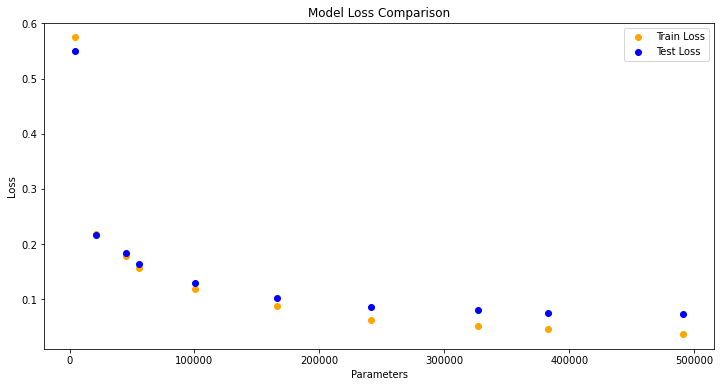

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, temp_1, color = "orange")
plt.scatter(param_arr, temp_2, color = "blue")
plt.title('Model Loss Comparison')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.show()

PLOT THE COMPARISON OF ACCURACY FOR ALL MODELS

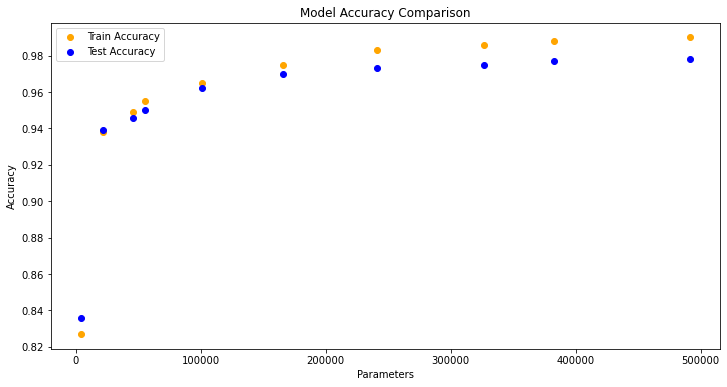

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(param_arr, train_acc_arr, color = "orange")
plt.scatter(param_arr, test_acc_arr, color = "blue")
plt.title('Model Accuracy Comparison')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.show()